## **Question:** Classify the MNIST dataset using ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

##Loading data from keras

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
len(x_train)
len(x_test)

10000

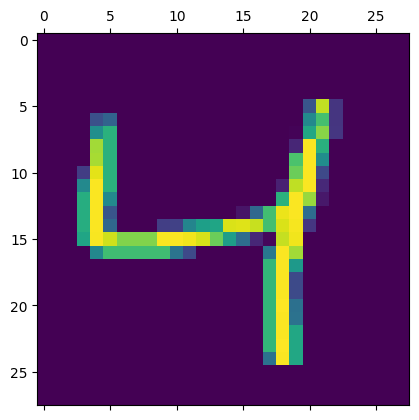

In [ ]:
plt.matshow(x_train[2])

In [ ]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

## Reshape the two dimension data into one dimention

In [ ]:
x_train_flatterned=x_train.reshape(len(x_train),28*28)
x_test_flatterned=x_test.reshape(len(x_test),28*28)
x_test_flatterned.shape

(10000, 784)

## Create ANN with no hidden layers and train

In [ ]:
 model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 model.fit(x_train_flatterned,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4653 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9263


In [ ]:
model.evaluate(x_test_flatterned,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9269


[0.26631611585617065, 0.9269000291824341]

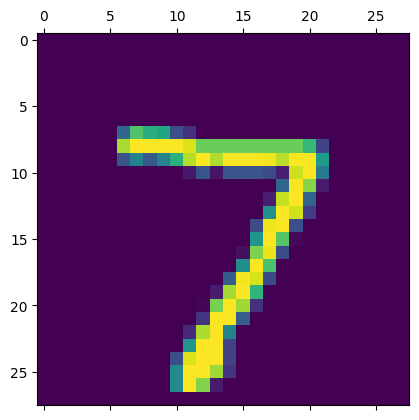

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predict=model.predict(x_test_flatterned)
y_predict[0]

313/313 [==============================] - 0s 1ms/step


array([1.7583538e-02, 2.4576678e-07, 6.5465227e-02, 9.5576447e-01,
       2.8323804e-03, 9.8266929e-02, 2.0202938e-06, 9.9971855e-01,
       9.0169869e-02, 5.9541172e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

7

## Create confusion Matrix to see prediction accuracy

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predict]

Text(95.72222222222221, 0.5, 'Truth')

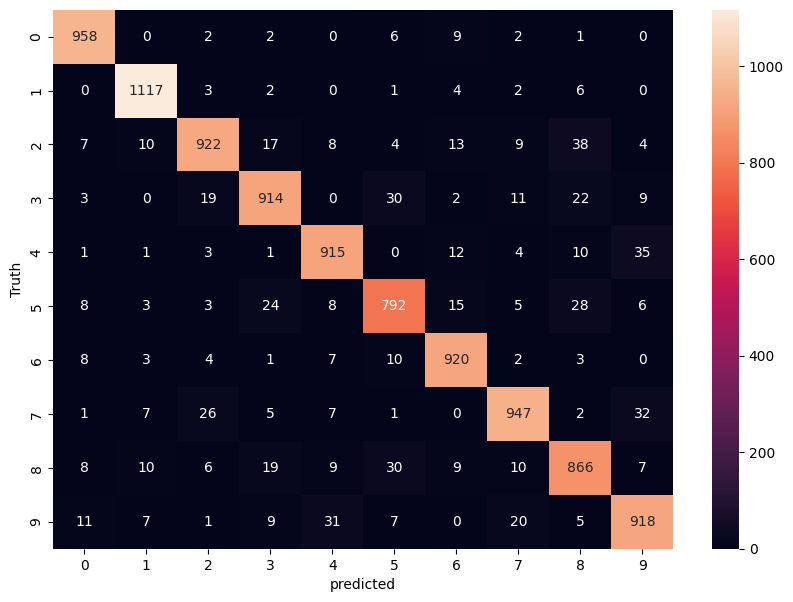

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

Create ANN with single hidden layers and train and see the improve of accuracy of the model

In [ ]:
 model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')])
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 model.fit(x_train_flatterned,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2706 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1241 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0858 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0647 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0517 - accuracy: 0.9844


In [ ]:
model.evaluate(x_test_flatterned,y_test)
y_predict=model.predict(x_test_flatterned)

313/313 [==============================] - 1s 2ms/step


## Create Confusion matrix to see the improve of accuracy

Text(95.72222222222221, 0.5, 'Truth')

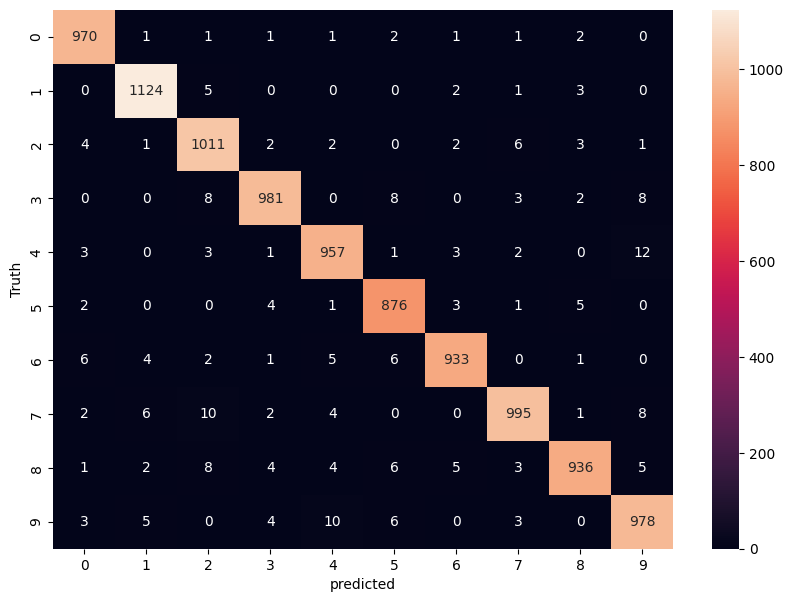

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')


## **Conclusion:** Using ANN with one hidden layers gives more accuracy then the previous ANN with no hidden layers.